In [1]:
!pip install japanize-matplotlib

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120258 sha256=7611d4a470e82b98109c7f302cc48e1fe1efd638589c4a028243d3fd5b777fac
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
input_data= [[0,0] , [1,0] , [0,1] , [1,1]]
xor_data = [0, 1, 1, 0]

x_train = x_test = np.array(input_data)
y_train = y_test = np.array(xor_data)

print("学習データ（問題）：")
print(x_train)
print(f"学習データ（答え）： {y_train}")

学習データ（問題）：
[[0 0]
 [1 0]
 [0 1]
 [1 1]]
学習データ（答え）： [0 1 1 0]


In [4]:
model00 = keras.models.Sequential()
model00.add(layers.Dense(3, activation ="relu", input_dim=2))
model00.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = keras.models.Sequential()
model.add(layers.Dense(8, activation ="relu", input_dim=2))
model.add(layers.Dense(8, activation ="relu"))
model.add(layers.Dense(2, activation ="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",                         #最適化アルゴリズム --> adamとは
              loss = "sparse_categorical_crossentropy",  #
              metrics = ["accuracy"]
              )
history = model.fit(x_train, y_train, epochs =500,
                    validation_data=(x_test, y_test))     # データが少ないから、validationも、同じデータでやっているのか。

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc: .2%}です")

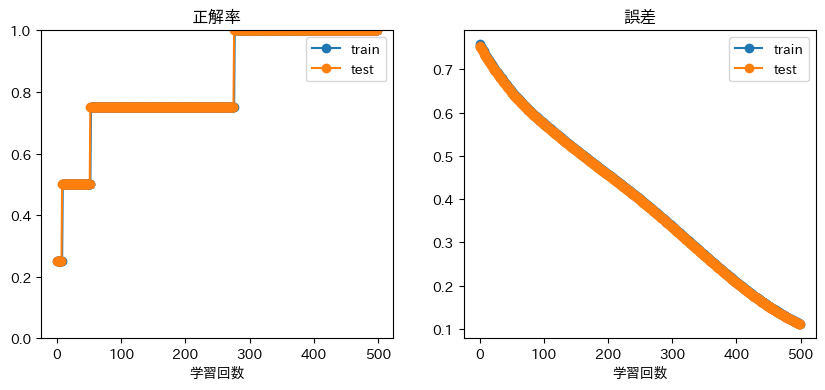

In [7]:
param = [["正解率" , "accuracy" , "val_accuracy"],
          ["誤差","loss" , "val_loss"]]

plt.figure(figsize=(10,4))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.title(param[i][0])      #
  plt.plot(history.history[param[i][1]] , "o-")
  plt.plot(history.history[param[i][2]] , "o-")
  plt.xlabel("学習回数")
  plt.legend(["train","test"] , loc ="best")
  if i==0:
    plt.ylim([0,1])
plt.show()

In [13]:
# データを渡して予測
pre = model.predict(x_test)
print(pre)

1/1 [==============================] - 0s 160ms/step
[[0.81279975 0.18720025]
 [0.03196299 0.968037  ]
 [0.04770498 0.95229506]
 [0.81279975 0.18720025]]


In [14]:
for i in range(4):
  index = np.argmax(pre[i])
  print(f"入力は{x_test[i]}、出力は{index}")

入力は[0 0]、出力は0
入力は[1 0]、出力は1
入力は[0 1]、出力は1
入力は[1 1]、出力は0
